<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Times_series_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#transformers for time series data
# n-beats: neural basis expansion analysis for interpretable time series forecasting
# detrend data
#remove seasonality
#turn into supervised learning process
#get baseline , important for ML problems start with simple
# naive baseline = predict the last time step as the next step
#being able to quantify our confidence in forecasting referred to as uncertainty, confidence interval, prediction interval
#UBER uses Bayesian or MC dropout
# one way to do this is Monte Carlo dropout is to use dropout at inference and run multiple simulations
#two types of uncertainty
#1. coconut uncertainty - get hit on a beach by coconut = epistemic uncertainty./ hard to estimate
#2. subway uncertainty - train should appear at 5pm but it shows up 1-2 min either side. = aleatory uncertainty=
#aleatory uncertainty = data uncertainty
#weather = predict every day 
#nate silver vs Nasim Taleb
# politic outcomes = open system, many different variables
#silver says that last outcome is all that matters
#taleb says 
#WRMSSE = WEIGHT ROOT MEAN SQUARE ERROR
#kaggle 101 = GOT A TABULAR DATA? THEN STACK TOGETHER ENSEMBLES OF LIGHTGBM/XGBOOST




In [1]:
#want to replicate https://arxiv.org/pdf/1905.10437.pdf
#get data
#format data
#build model
#test model
#play around with uncertainty
#the best models were ensembles of statistical techniques

In [2]:
!wget https://github.com/ElementAI/N-BEATS

--2022-04-08 12:15:00--  https://github.com/ElementAI/N-BEATS
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘N-BEATS’

N-BEATS                 [ <=>                ] 179.59K  --.-KB/s    in 0.01s   

2022-04-08 12:15:00 (14.4 MB/s) - ‘N-BEATS’ saved [183903]



In [3]:
!wget https://github.com/ElementAI/N-BEATS/tree/master/datasets

--2022-04-08 12:15:40--  https://github.com/ElementAI/N-BEATS/tree/master/datasets
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘datasets’

datasets                [ <=>                ] 109.99K  --.-KB/s    in 0.01s   

2022-04-08 12:15:40 (10.4 MB/s) - ‘datasets’ saved [112631]



In [5]:
!git clone https://github.com/Mcompetitions/M4-methods

Cloning into 'M4-methods'...
remote: Enumerating objects: 2482, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 2482 (delta 3), reused 0 (delta 0), pack-reused 2473
Receiving objects: 100% (2482/2482), 1.40 GiB | 37.00 MiB/s, done.
Resolving deltas: 100% (707/707), done.
Checking out files: 100% (320/320), done.


In [6]:
! ls M4-methods/Dataset/Train/

Daily-train.csv   Monthly-train.csv    Weekly-train.csv
Hourly-train.csv  Quarterly-train.csv  Yearly-train.csv


In [18]:
import pandas as pd
daily = pd.read_csv("M4-methods/Dataset/Train/Daily-train.csv")
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4227 entries, 0 to 4226
Columns: 9920 entries, V1 to V9920
dtypes: float64(9919), object(1)
memory usage: 319.9+ MB


In [19]:
daily.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9911,V9912,V9913,V9914,V9915,V9916,V9917,V9918,V9919,V9920
0,D1,1017.10,1019.30,1017.00,1019.20,1018.70,1015.60,1018.50,1018.30,1018.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D2,2793.70,2793.80,2803.70,2805.80,2802.30,2795.00,2806.40,2782.20,2780.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D3,1091.30,1088.50,1085.70,1082.90,1080.10,1077.30,1074.50,1071.70,1068.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D4,1092.00,1078.00,1064.00,1050.00,1036.00,1022.00,1008.00,1092.00,1078.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D5,2938.63,2956.44,2964.41,2972.41,3014.97,3014.23,3024.08,3031.97,3062.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Transpose
d1 = daily.loc[0].transpose()
d1.head()

V1        D1
V2    1017.1
V3    1019.3
V4    1017.0
V5    1019.2
Name: 0, dtype: object

In [69]:
d1_new=pd.DataFrame(d1).reset_index().drop([0])
d1_new = d1_new.drop("index", axis=1)
d1_new.columns = ["values"]
d1_new

,values
1,1017.1
2,1019.3
3,1017.0
4,1019.2
5,1018.7
...,...
9915,NaN
9916,NaN
9917,NaN
9918,NaN


In [70]:
d1_new.head()

,values
1,1017.1
2,1019.3
3,1017.0
4,1019.2
5,1018.7


In [74]:
d1_new.isna().value_counts()

index  0    
False  True     8913
       False    1006
dtype: int64

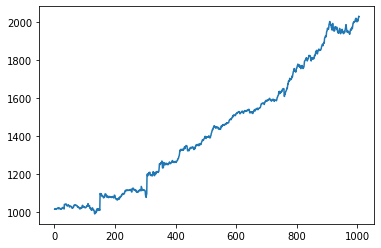

In [83]:
d1_new[0].plot()

In [84]:
d1_new = pd.DataFrame(d1).reset_index().drop([0])
d1_new

,index,0
1,V2,1017.1
2,V3,1019.3
3,V4,1017.0
4,V5,1019.2
5,V6,1018.7
...,...,...
9915,V9916,NaN
9916,V9917,NaN
9917,V9918,NaN
9918,V9919,NaN


In [85]:
d1_new.head()

,index,0
1,V2,1017.1
2,V3,1019.3
3,V4,1017.0
4,V5,1019.2
5,V6,1018.7


In [86]:
import pandas as pd
weekly = pd.read_csv("M4-methods/Dataset/Train/Weekly-train.csv")
weekly.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2589,V2590,V2591,V2592,V2593,V2594,V2595,V2596,V2597,V2598
0,W1,1089.200,1078.910,1079.88,1063.580,1060.61,1056.930,1056.630,1049.510,1049.320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W2,195.928,194.796,192.71,190.288,188.77,187.043,187.353,186.808,186.721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W3,258.700,259.800,260.20,260.800,261.10,263.100,264.500,266.300,267.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W4,3460.000,3340.000,2770.00,2520.000,2740.00,2760.000,2470.000,2480.000,3260.000,...,2315.35,2195.23,2170.14,2156.88,2177.15,1932.91,2056.49,1984.55,2004.56,2385.81
4,W5,4696.000,4765.000,4144.00,3945.000,4733.00,4330.000,5046.000,3898.000,4568.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
import pandas as pd
info = pd.read_csv("M4-methods/Dataset/M4-info.csv")
info

,M4id,category,Frequency,Horizon,SP,StartingDate
0,Y1,Macro,1,6,Yearly,01-01-79 12:00
1,Y2,Macro,1,6,Yearly,01-01-79 12:00
2,Y3,Macro,1,6,Yearly,01-01-79 12:00
3,Y4,Macro,1,6,Yearly,01-01-79 12:00
4,Y5,Macro,1,6,Yearly,01-01-79 12:00
...,...,...,...,...,...,...
99995,H410,Other,24,48,Hourly,01-01-17 12:00
99996,H411,Other,24,48,Hourly,01-01-17 12:00
99997,H412,Other,24,48,Hourly,01-01-17 12:00
99998,H413,Other,24,48,Hourly,12-06-17 12:00


In [88]:
info

,M4id,category,Frequency,Horizon,SP,StartingDate
0,Y1,Macro,1,6,Yearly,01-01-79 12:00
1,Y2,Macro,1,6,Yearly,01-01-79 12:00
2,Y3,Macro,1,6,Yearly,01-01-79 12:00
3,Y4,Macro,1,6,Yearly,01-01-79 12:00
4,Y5,Macro,1,6,Yearly,01-01-79 12:00
...,...,...,...,...,...,...
99995,H410,Other,24,48,Hourly,01-01-17 12:00
99996,H411,Other,24,48,Hourly,01-01-17 12:00
99997,H412,Other,24,48,Hourly,01-01-17 12:00
99998,H413,Other,24,48,Hourly,12-06-17 12:00


In [89]:
info[info["M4id"].str.contains("D")]

,M4id,category,Frequency,Horizon,SP,StartingDate
95359,D1,Macro,1,14,Daily,03-01-94 12:00
95360,D2,Macro,1,14,Daily,02-01-95 12:00
95361,D3,Macro,1,14,Daily,05-01-06 12:00
95362,D4,Macro,1,14,Daily,30-05-96 12:00
95363,D5,Macro,1,14,Daily,03-01-97 12:00
...,...,...,...,...,...,...
99581,D4223,Other,1,14,Daily,28-07-16 12:00
99582,D4224,Other,1,14,Daily,28-07-16 12:00
99583,D4225,Other,1,14,Daily,14-09-16 12:00
99584,D4226,Other,1,14,Daily,03-01-00 12:00


In [90]:
#to format time series data, turn it into supervised learning problem
# build model to use steps from past to predict future
# one common method for doing this is windowing() method. 
#predict 14 days into the future
#currently have daily data set
# frequency map = 1
#example of windowing for a weeek
#(0,1,3,4,5,6,7) -> (7)
#(1,2,3,4,5,6,7) -> (8)
#(2,3,4,5,6,7,8) -> (9)

In [ ]:
# make train, test for time series

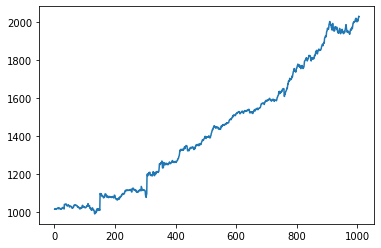

In [92]:
d1_new[0].plot()

In [95]:
#turn data into arrays
values = d1_new[0].to_numpy()
values

array([1017.1, 1019.3, 1017.0, ..., nan, nan, nan], dtype=object)

In [102]:
import numpy as np

d1_new.dropna(inplace=True)
timesteps = np.array(d1_new.index)
values, timesteps

(array([1017.1, 1019.3, 1017.0, ..., nan, nan, nan], dtype=object),
 array([   1,    2,    3, ..., 1004, 1005, 1006]))

In [105]:
# lets make train test split
#1:47:25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(values,
                                                     timesteps,
                                                     test_size = 0.2)

ValueError: ignored

In [ ]:
for in range(100):
  model.predict(X)
  layers.Dropout(0.5, training=True)

SyntaxError: ignored